Let's read the dataset

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MLDM /Course Work-2/Insurance cross sell.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [2]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [3]:
df = df.drop(['id'],axis=1)
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


No. of rows in the dataset

In [ ]:
df.shape[0]

381109

Let's see if there are any null values in the dataset. We can see that there are zero null values in the dataset

In [ ]:
df.isnull().sum().sum()

0

Data Exploration

In [4]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [5]:
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [6]:
df=pd.get_dummies(df,drop_first=True)

In [7]:
df=df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year']=df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years']=df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes']=df['Vehicle_Damage_Yes'].astype('int')

Responses (Interested vs not interested)

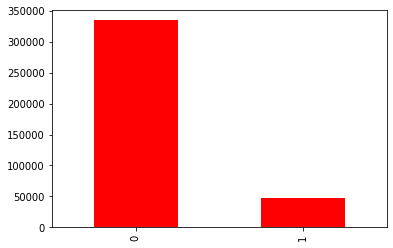

In [ ]:
df["Response"].value_counts().plot.bar(colormap="autumn")

In [ ]:
negative_response = df[df["Response"] == 0].value_counts().sum()
positive_response = df[df["Response"] == 1].value_counts().sum()
print("The percentage of positive response is :", round(positive_response*100/negative_response), "%")

The percentage of positive response is : 14.0 %


Gender (Interested vs not interested)

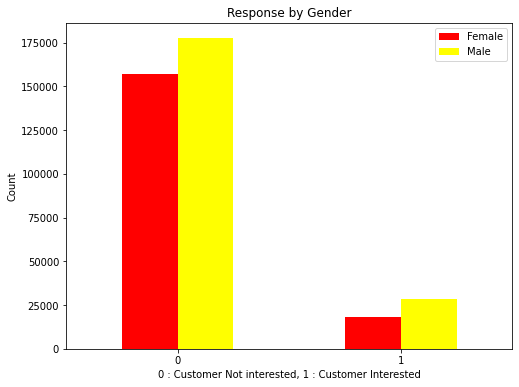

In [ ]:
import matplotlib.pyplot as plt
pd.crosstab(df['Response'], df['Gender']).plot(kind="bar", figsize=(8,6), colormap="autumn")
plt.title("Response by Gender")
plt.xlabel("0 : Customer Not interested, 1 : Customer Interested")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

Previously Issued (Interested vs not interested)

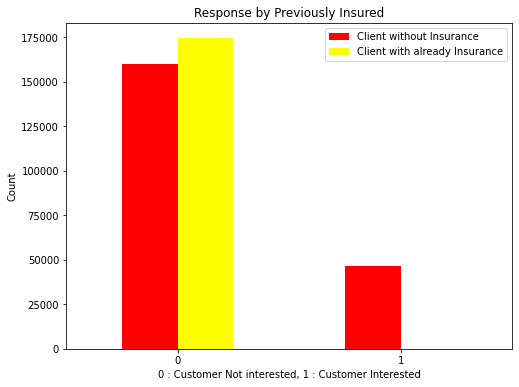

In [ ]:
pd.crosstab(df['Response'], df['Previously_Insured']).plot(kind="bar", figsize=(8,6), colormap="autumn")
plt.title("Response by Previously Insured")
plt.xlabel("0 : Customer Not interested, 1 : Customer Interested")
plt.ylabel("Count")
plt.legend(["Client without Insurance", "Client with already Insurance"])
plt.xticks(rotation=0);

Driving license (Interested vs not interested)

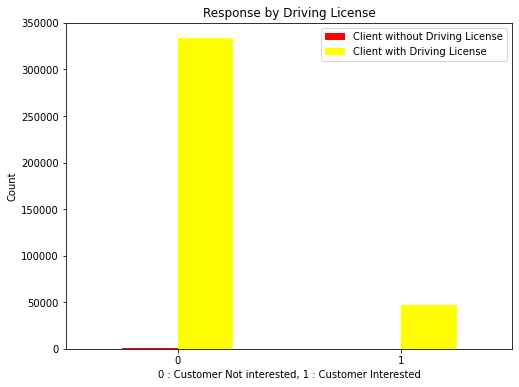

In [ ]:
pd.crosstab(df['Response'], df['Driving_License']).plot(kind="bar", figsize=(8,6), colormap="autumn")
plt.title("Response by Driving License")
plt.xlabel("0 : Customer Not interested, 1 : Customer Interested")
plt.ylabel("Count")
plt.legend(["Client without Driving License", "Client with Driving License"])
plt.xticks(rotation=0);

Vehicles age (Interested vs not interested)

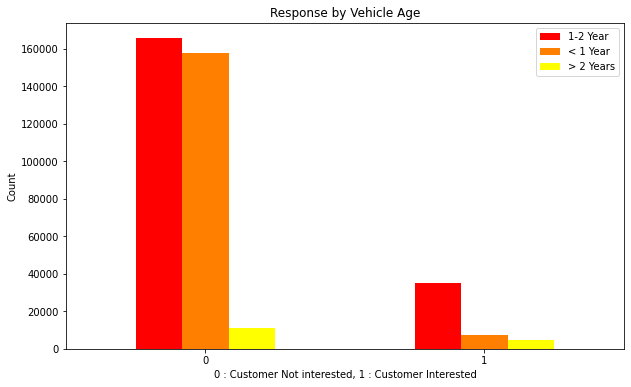

In [ ]:
pd.crosstab(df['Response'], df['Vehicle_Age']).plot(kind="bar", figsize=(10,6), colormap="autumn")
plt.title("Response by Vehicle Age")
plt.xlabel("0 : Customer Not interested, 1 : Customer Interested")
plt.ylabel("Count")
plt.legend(["1-2 Year", "< 1 Year", "> 2 Years"])
plt.xticks(rotation=0);

Vehicles damage (Interested vs not interested)

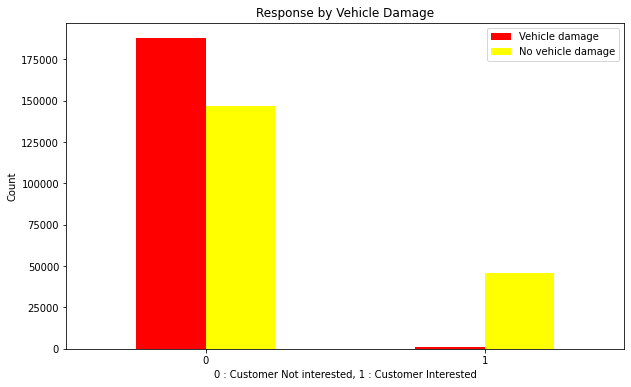

In [ ]:
pd.crosstab(df['Response'], df['Vehicle_Damage']).plot(kind="bar", figsize=(10,6), colormap="autumn")
plt.title("Response by Vehicle Damage")
plt.xlabel("0 : Customer Not interested, 1 : Customer Interested")
plt.ylabel("Count")
plt.legend(["Vehicle damage", "No vehicle damage"])
plt.xticks(rotation=0);

Age distribution of customers

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



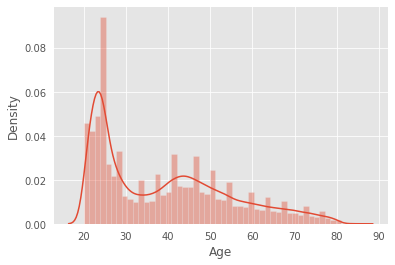

In [ ]:
import seaborn as sns
sns.distplot(df.Age)

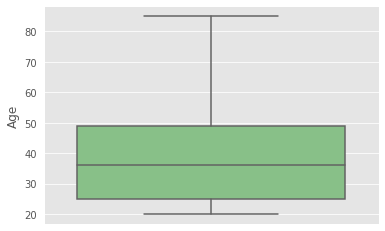

In [ ]:
sns.boxplot(y = 'Age', data = df, palette='Accent')

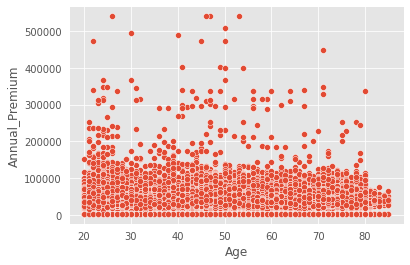

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Annual_Premium'])

Vintage

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



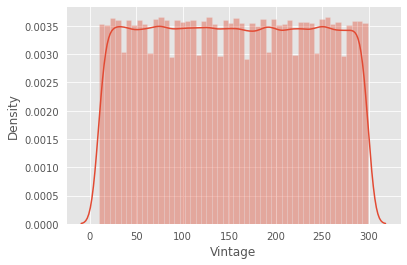

In [ ]:
sns.distplot(df.Vintage)

Discrete Numeric

Text(0.5, 1.0, 'Policy Sales Channel Distribution')

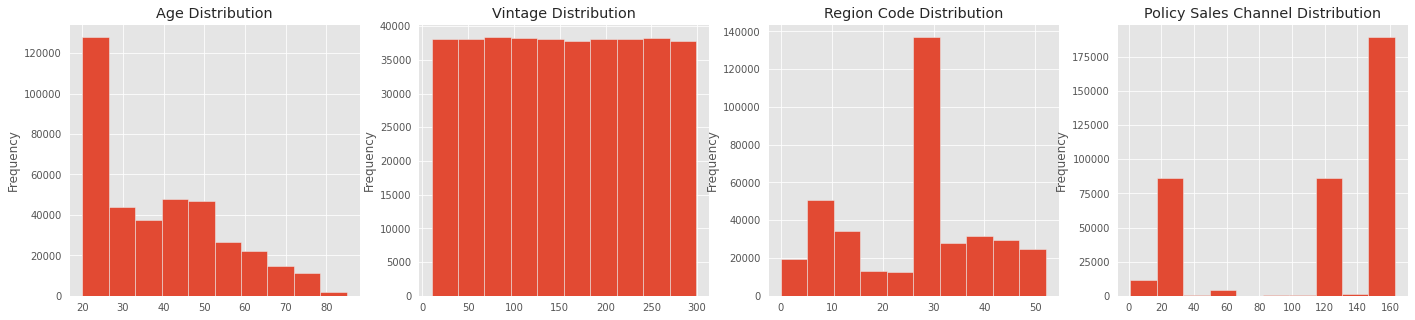

In [ ]:
plt.figure(figsize=(24,5))
plt.subplot(1,4,1)
df.Age.plot(kind='hist')
plt.title("Age Distribution")
plt.subplot(1,4,2)
df.Vintage.plot(kind='hist')
plt.title("Vintage Distribution")
plt.subplot(1,4,3)
df.Region_Code.plot(kind='hist')
plt.title("Region Code Distribution")
plt.subplot(1,4,4)
df.Policy_Sales_Channel.plot(kind='hist')
plt.title("Policy Sales Channel Distribution")

Text(0.5, 1.0, 'Policy Sales Channel Distribution')

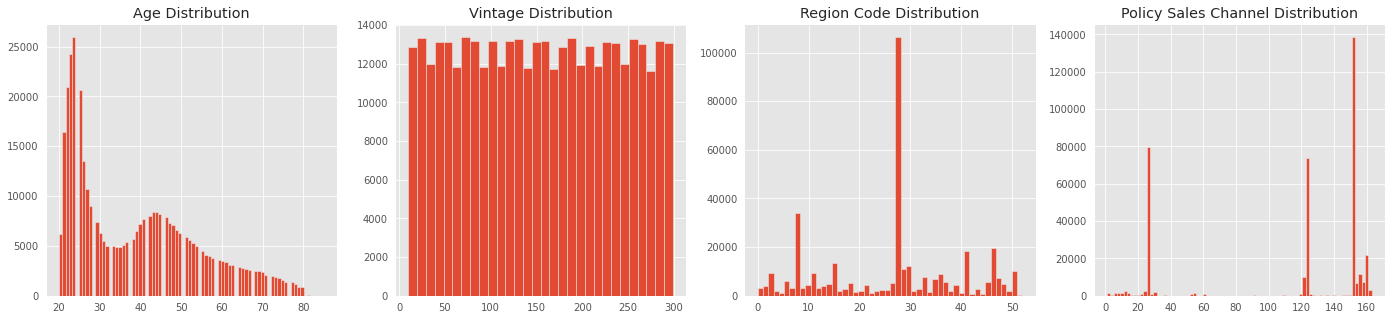

In [ ]:
plt.figure(figsize=(24,5))
plt.subplot(1,4,1)
df.Age.hist(bins=80)
plt.title("Age Distribution")
plt.subplot(1,4,2)
df.Vintage.hist(bins=30)
plt.title("Vintage Distribution")
plt.subplot(1,4,3)
df.Region_Code.hist(bins=50)
plt.title("Region Code Distribution")
plt.subplot(1,4,4)
df.Policy_Sales_Channel.hist(bins=80)
plt.title("Policy Sales Channel Distribution")

Text(0.5, 1.0, 'Policy Sales Channel Distribution')

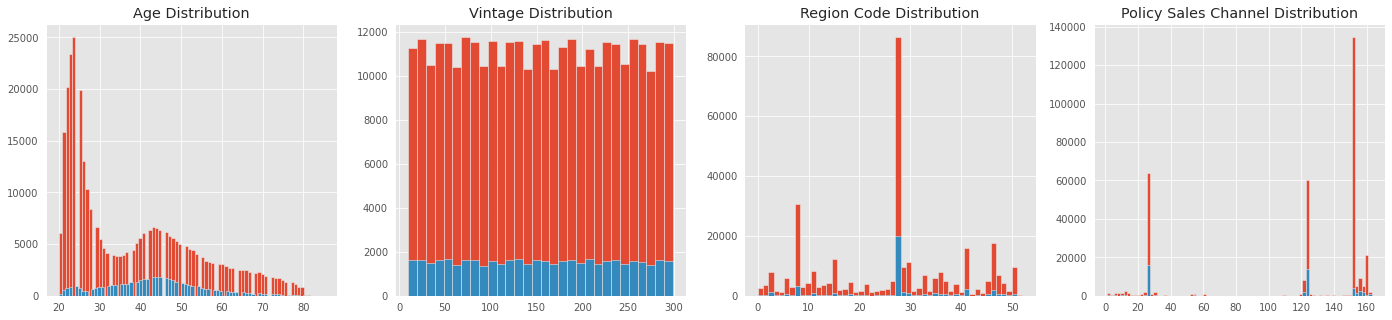

In [ ]:
plt.figure(figsize=(24,5))
plt.subplot(1,4,1)
df.groupby('Response').Age.hist(bins=80)
plt.title("Age Distribution")
plt.subplot(1,4,2)
df.groupby('Response').Vintage.hist(bins=30)
plt.title("Vintage Distribution")
plt.subplot(1,4,3)
df.groupby('Response').Region_Code.hist(bins=50)
plt.title("Region Code Distribution")
plt.subplot(1,4,4)
df.groupby('Response').Policy_Sales_Channel.hist(bins=80)
plt.title("Policy Sales Channel Distribution")

In [ ]:
df.Region_Code.value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [ ]:
df.Policy_Sales_Channel.value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
149.0         1
84.0          1
143.0         1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

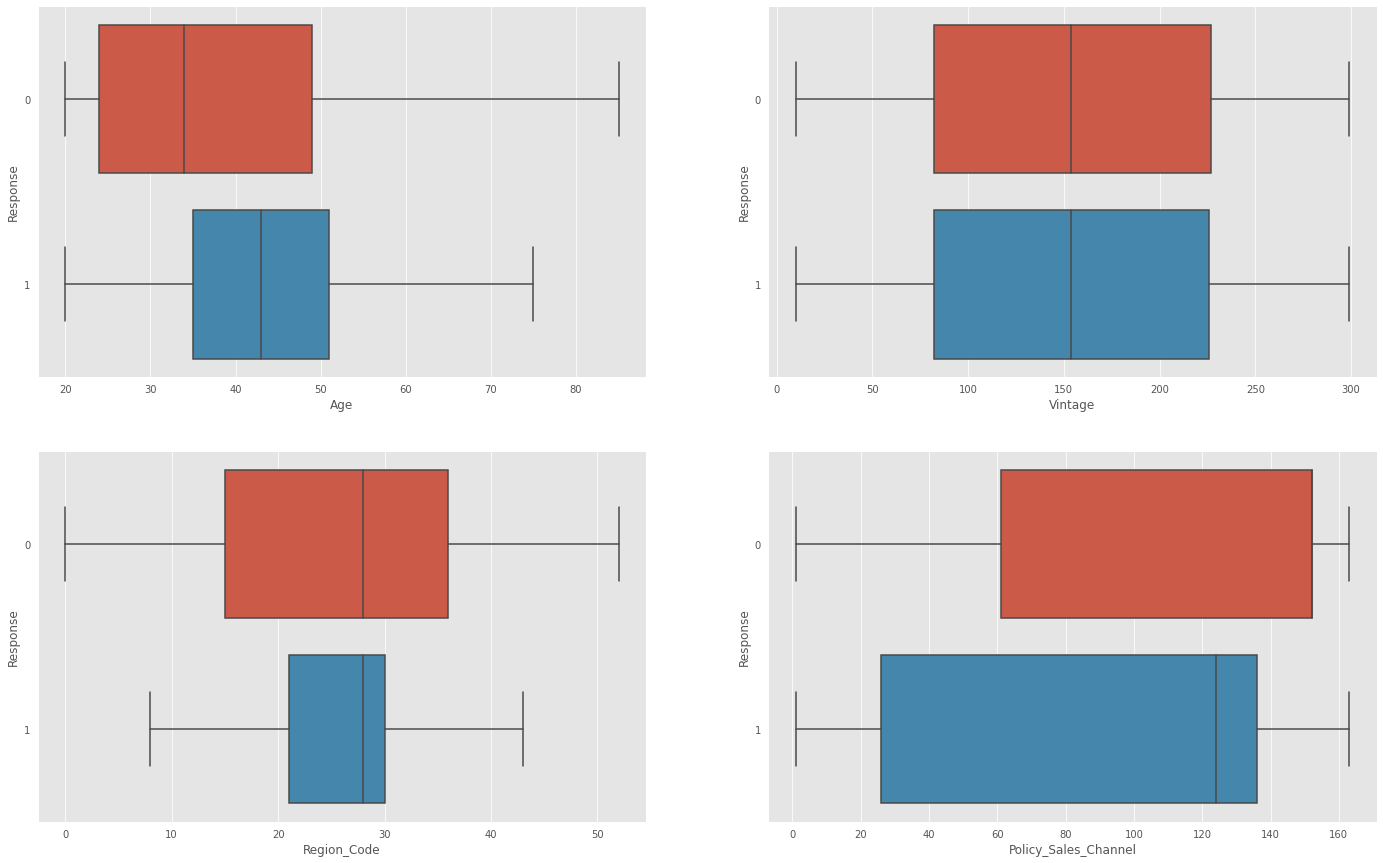

In [ ]:
plt.figure(figsize=(24,15))
plt.subplot(2,2,1)
sns.boxplot(y = 'Response', x = 'Age', data = df, fliersize = 0, orient = 'h')
plt.subplot(2,2,2)
sns.boxplot(y = 'Response', x = 'Vintage', data = df, fliersize = 0, orient = 'h')
plt.subplot(2,2,3)
sns.boxplot(y = 'Response', x = 'Region_Code', data = df, fliersize = 0, orient = 'h')
plt.subplot(2,2,4)
sns.boxplot(y = 'Response', x = 'Policy_Sales_Channel', data = df, fliersize = 0, orient = 'h')

Text(0.5, 1.0, 'Policy Sales Channel Distribution')

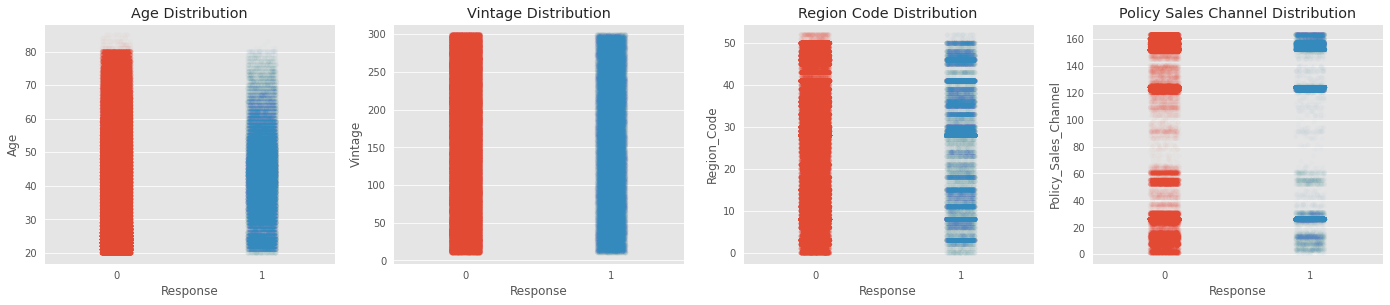

In [ ]:
plt.figure(figsize=(24,15))
plt.subplot(3,4,1)
sns.stripplot(x='Response', y='Age', data=df, alpha=0.01, jitter=True);
plt.title("Age Distribution")
plt.subplot(3,4,2)
sns.stripplot(x='Response', y='Vintage', data=df, alpha=0.01, jitter=True);
plt.title("Vintage Distribution")
plt.subplot(3,4,3)
sns.stripplot(x='Response', y='Region_Code', data=df, alpha=0.01, jitter=True);
plt.title("Region Code Distribution")
plt.subplot(3,4,4)
sns.stripplot(x='Response', y='Policy_Sales_Channel', data=df, alpha=0.01, jitter=True);
plt.title("Policy Sales Channel Distribution")

Continuous Numeric

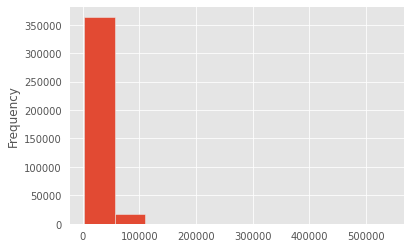

In [ ]:
df.Annual_Premium.plot(kind='hist')

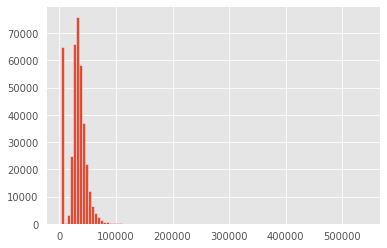

In [ ]:
df.Annual_Premium.hist(bins=100)

Response
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Annual_Premium, dtype: object

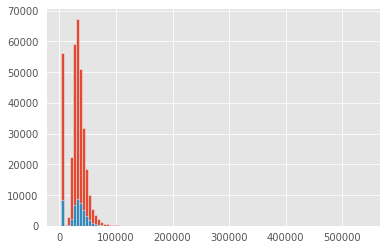

In [ ]:
df.groupby('Response').Annual_Premium.hist(bins=100)

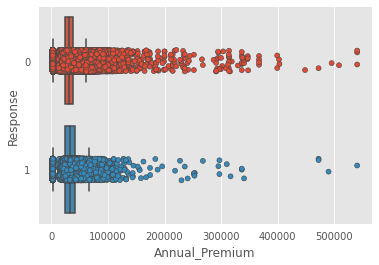

In [ ]:
sns.boxplot(y = 'Response', x = 'Annual_Premium', data = df, fliersize = 0, orient = 'h')
sns.stripplot(y = 'Response', x = 'Annual_Premium', data = df,linewidth = 0.6, orient = 'h')

Correlation between the features

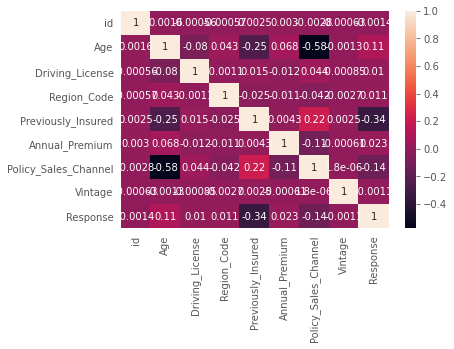

In [ ]:
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()